## In this notebook:

Comparing four methods to create molecular fingerprints
* MACCS Keys
* Morgan Fingerprints
* RDKit Path Based Fingerprints
* PubChem Fingerprints

Similarity comparision using three methods
* Tanimoto
* Dice
* Cosine

Downloaded 1000 random compounds from PubChem, and compared the distributions of similarities.

Fingerprint method has a much larger effect than choice of similarity method.

[From lecture 6 of Cheminformatics OLCC 2019](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019\))


In [244]:
import requests
import random
import time
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdmolops
from rdkit import DataStructs
from functools import partial
from statistics import mean, stdev
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [225]:
# Randomly select 1000 compounds from PubChem and download their SMILES strings
cid_max = 164889482
cids = []
random.seed(0)
chunk_size = 100
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

cids = [random.randint(1, cid_max) for i in range(1000)]

if len(cids) % chunk_size == 0 :
    num_chunks = int( len(cids) / chunk_size )
else :
    num_chunks = int( len(cids) / chunk_size ) + 1

smiles = []
    
for i in range(num_chunks):

    if (i == 0):
        print(f"Processing chunk (of {num_chunks}) ", end='')
    
    print(i+1, end=' ')
    
    idx1 = chunk_size * i
    idx2 = chunk_size * (i + 1)
    str_cids = ",".join([ str(x) for x in cids[idx1:idx2]])

    url = prolog + "/compound/cid/" + str_cids + "/property/isomericsmiles/txt"
    res = requests.get(url)

    if ( res.status_code == 200) :
        smiles.extend( res.text.split() )
    else :
        print("Chunk", i, "Failed to get SMILES.")
        
    time.sleep(0.2)

print("Done!")
print("# Number of SMILES : ", len(smiles))

Processing chunk (of 10) 1 2 3 4 5 6 7 8 9 10 Done!
# Number of SMILES :  1000


In [226]:
# Generate MACCS Keys
MACCS_fp = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smiles)) for smiles in smiles]
print(f"Number of MACCS keys : {len(MACCS_fp)}")

[17:57:52] WARNING: not removing hydrogen atom without neighbors


Number of MACCS keys : 1000


In [227]:
# Generate Morgan Fingerprints
morg_fp = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), 2, nBits=1024) for smile in smiles]
print(f"Number of Morgan Fingerprints : {len(morg_fp)}")

Number of Morgan Fingerprints : 1000


[17:57:53] WARNING: not removing hydrogen atom without neighbors


In [228]:
# Generate RDKit Path Based Fingerprints
rd_fp = [rdmolops.RDKFingerprint(Chem.MolFromSmiles(smile), fpSize=2048, minPath=1, maxPath=7) for smile in smiles]
print(f"Number of RDKit Fingerprints : {len(rd_fp)}")

[17:57:53] WARNING: not removing hydrogen atom without neighbors


Number of RDKit Fingerprints : 1000


In [229]:
from base64 import b64decode

def PCFP_BitString(pcfp_base64) :

    pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    return pcfp_bitstring


chunk_size = 100

if len(cids) % chunk_size == 0 :
    num_chunks = int( len(cids) / chunk_size )
else :
    num_chunks = int( len(cids) / chunk_size ) + 1

pcfps = []

for i in range(num_chunks):

    if (i == 0):
        print("Processing chunk ", end='')

    print(i, end=' ')

    idx1 = chunk_size * i
    idx2 = chunk_size * (i + 1)
    str_cids = ",".join([ str(x) for x in cids[idx1:idx2]])

    url = prolog + "/compound/cid/" + str_cids + "/property/Fingerprint2D/txt"
    res = requests.get(url)

    if ( res.status_code == 200) :
        pcfps.extend( res.text.split() )
    else :
        print("Chunk", i, "Failed to get Fingerprint.")

    time.sleep(0.2)

print("Done!")
print("# Number of FingerPrints : ", len(pcfps))

Processing chunk 0 1 2 3 4 5 6 7 8 9 Done!
# Number of FingerPrints :  1000


In [230]:
# Convert to bits and vectors
bit_pcfps = [PCFP_BitString(fp) for fp in pcfps]
vec_pcfps = [DataStructs.CreateFromBitString(PCFP_BitString(fp)) for fp in pcfps]

print(f"Number of PubChem Fingerprints : {len(vec_pcfps)}")

Number of PubChem Fingerprints : 1000


In [231]:
# Combine fingerprints
fingerprints = [
    ("MACCS keys", MACCS_fp),
    ("Morgan fingerprints", morg_fp),
    ("RDK fingerprint", rd_fp),
    ("PubChem fingerprint", vec_pcfps)
]

# Similarity methods
similarity_methods = [
    ("Tanimoto", DataStructs.TanimotoSimilarity),
    ("Dice", DataStructs.DiceSimilarity),
    ("Cosine", DataStructs.CosineSimilarity)
]

Using MACCS keys and Tanimoto similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


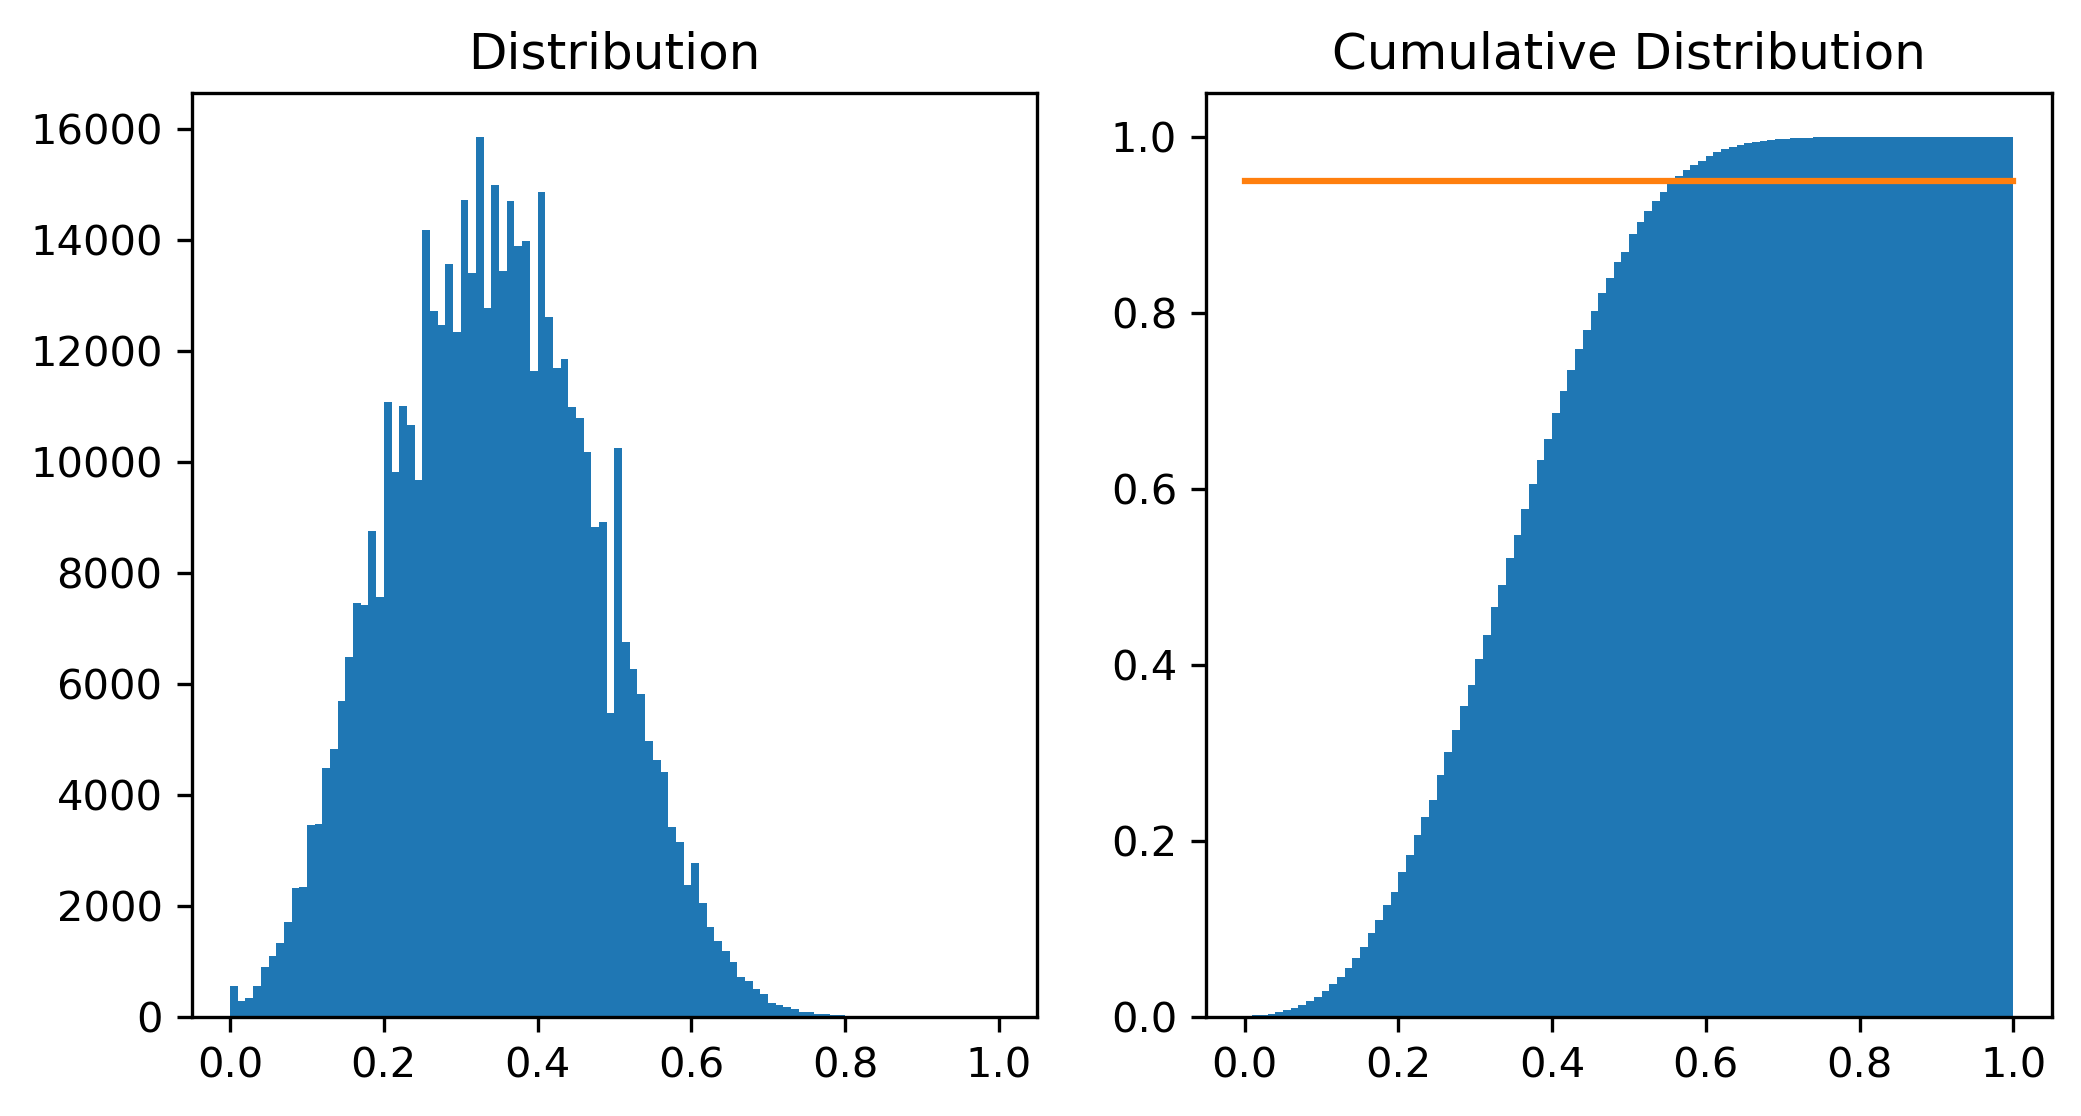



Using MACCS keys and Dice similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


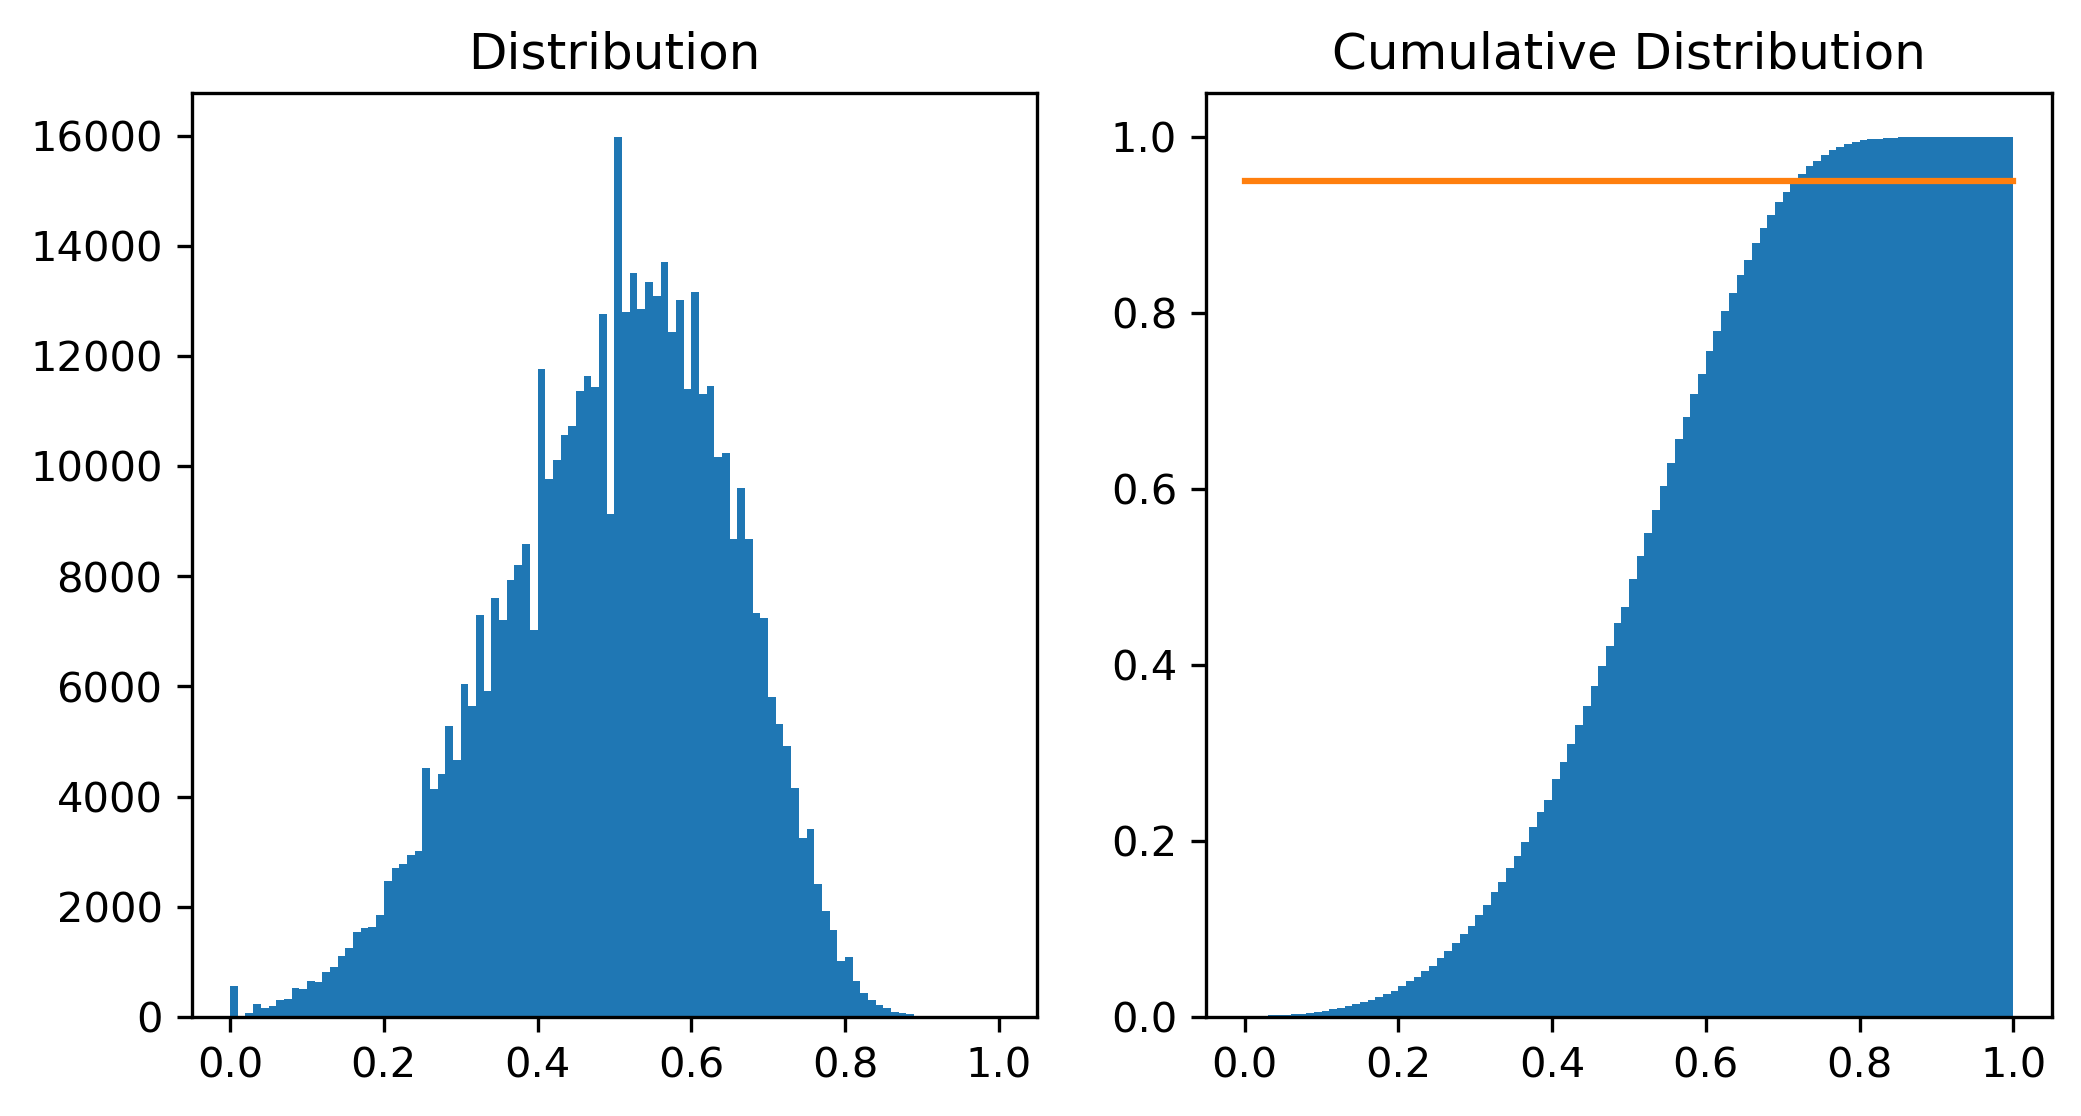



Using MACCS keys and Cosine similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


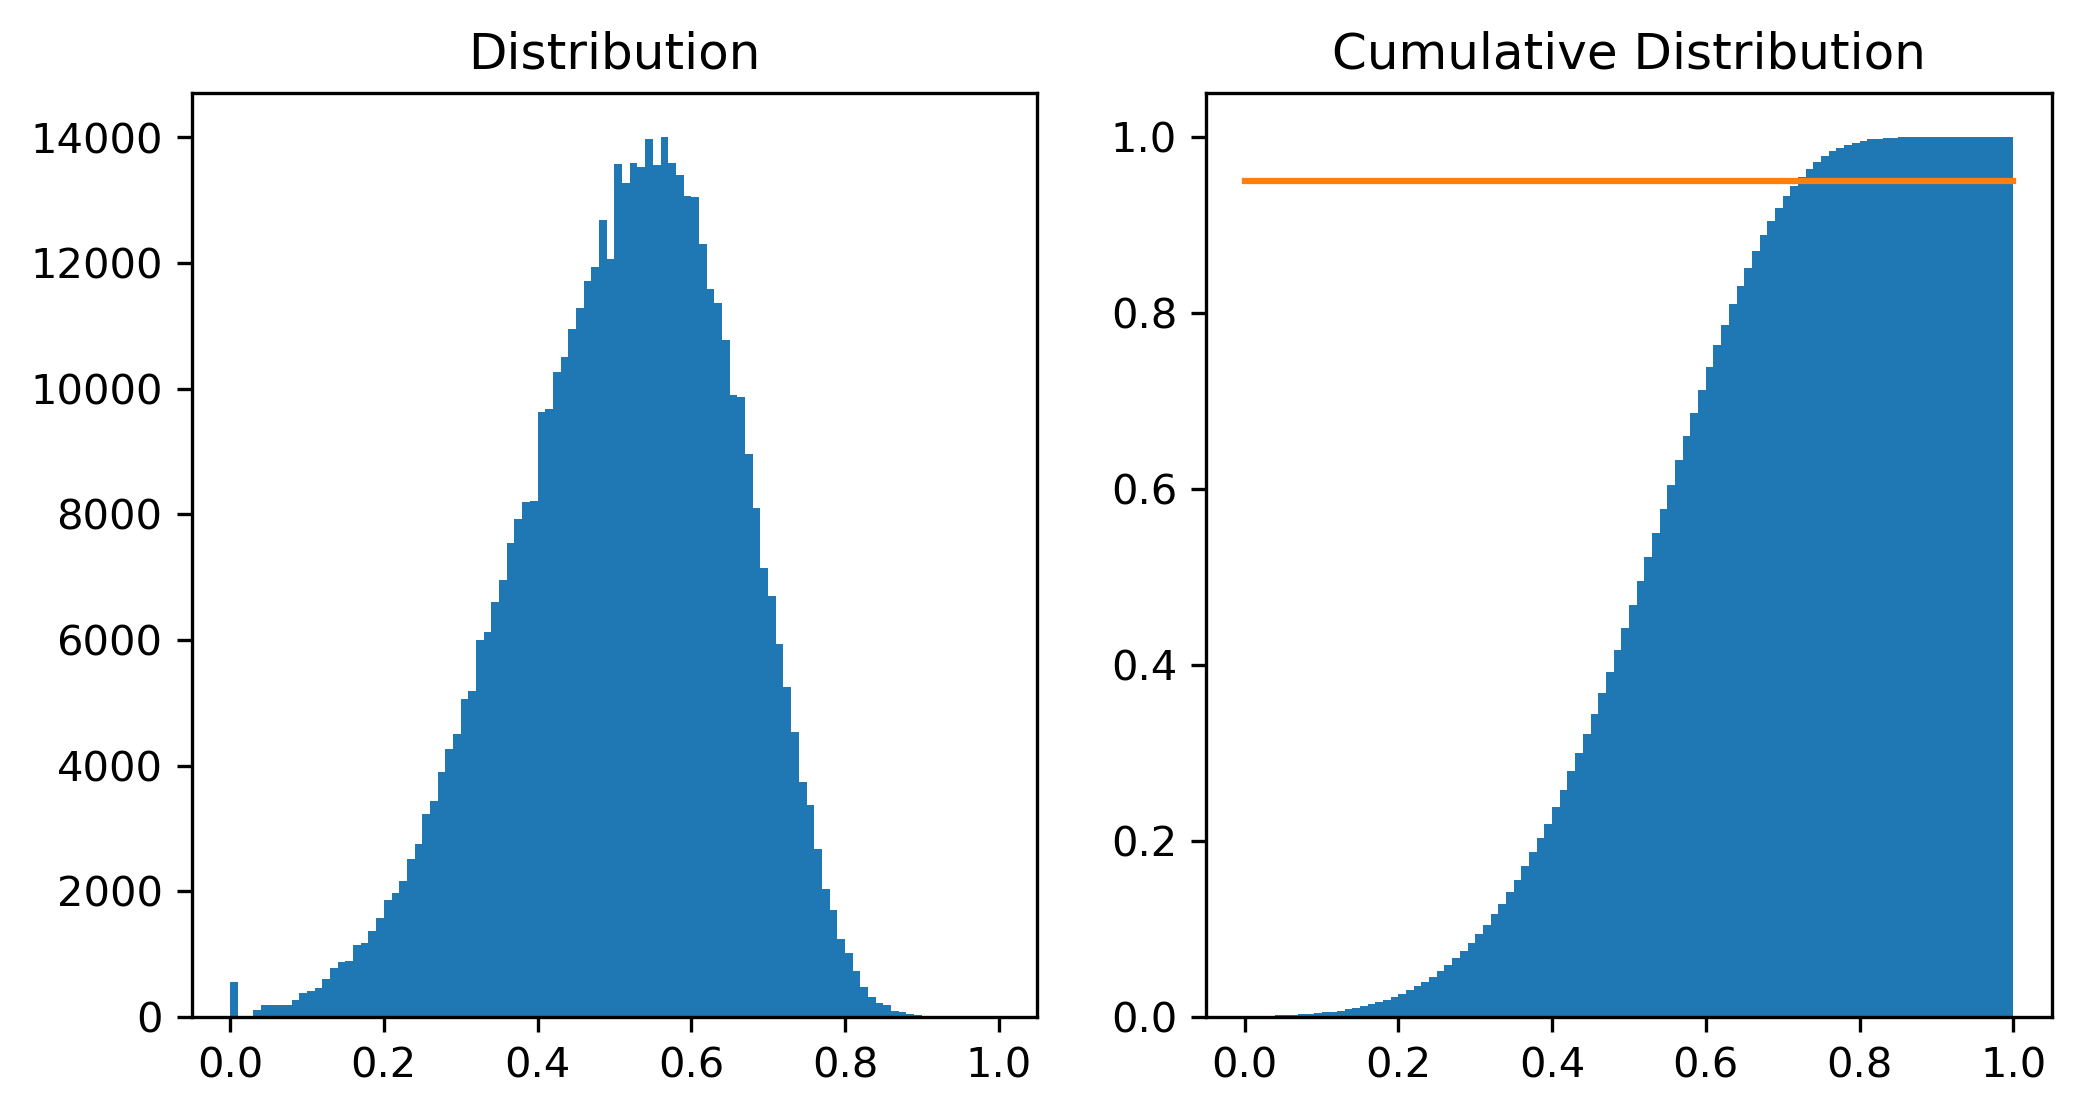



Using Morgan fingerprints and Tanimoto similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


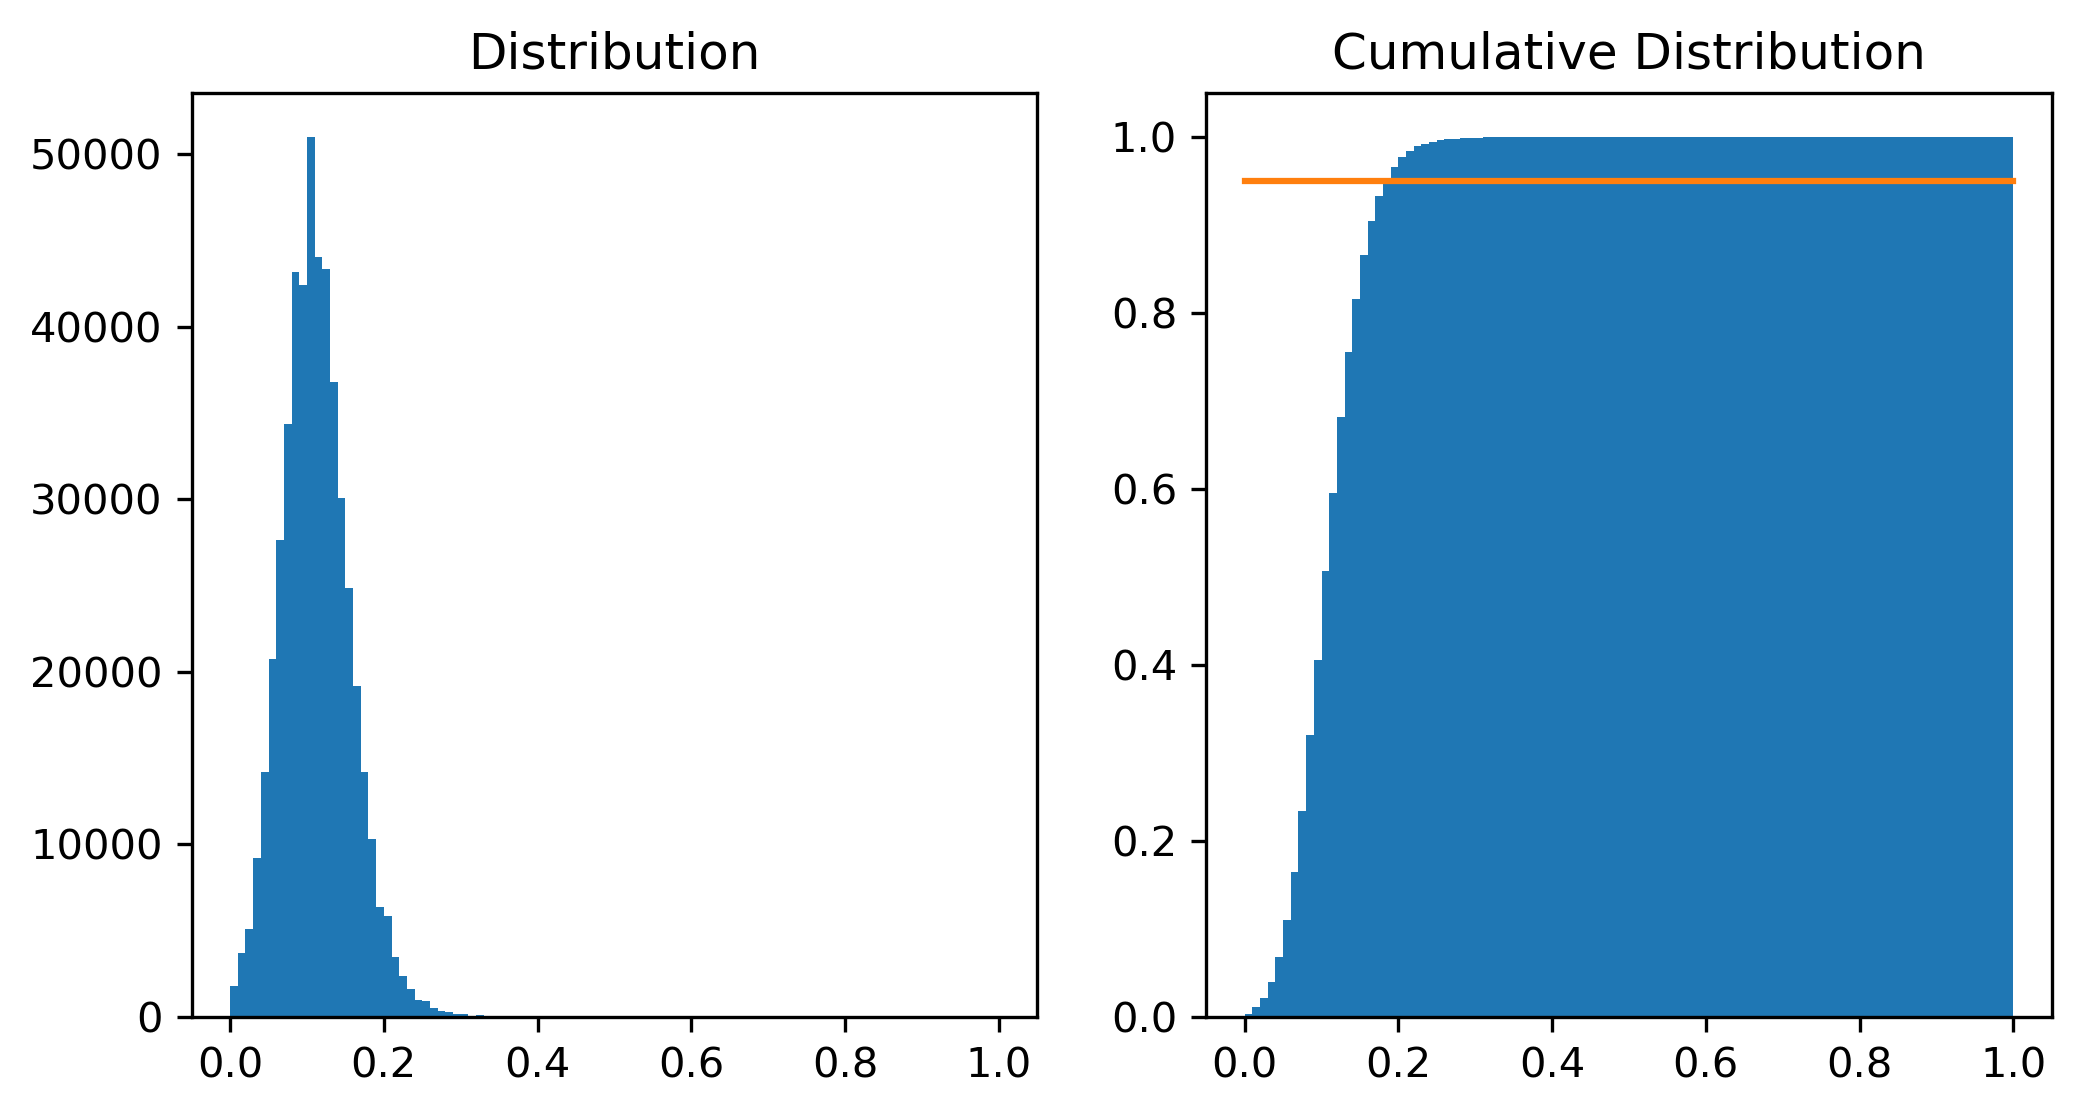



Using Morgan fingerprints and Dice similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


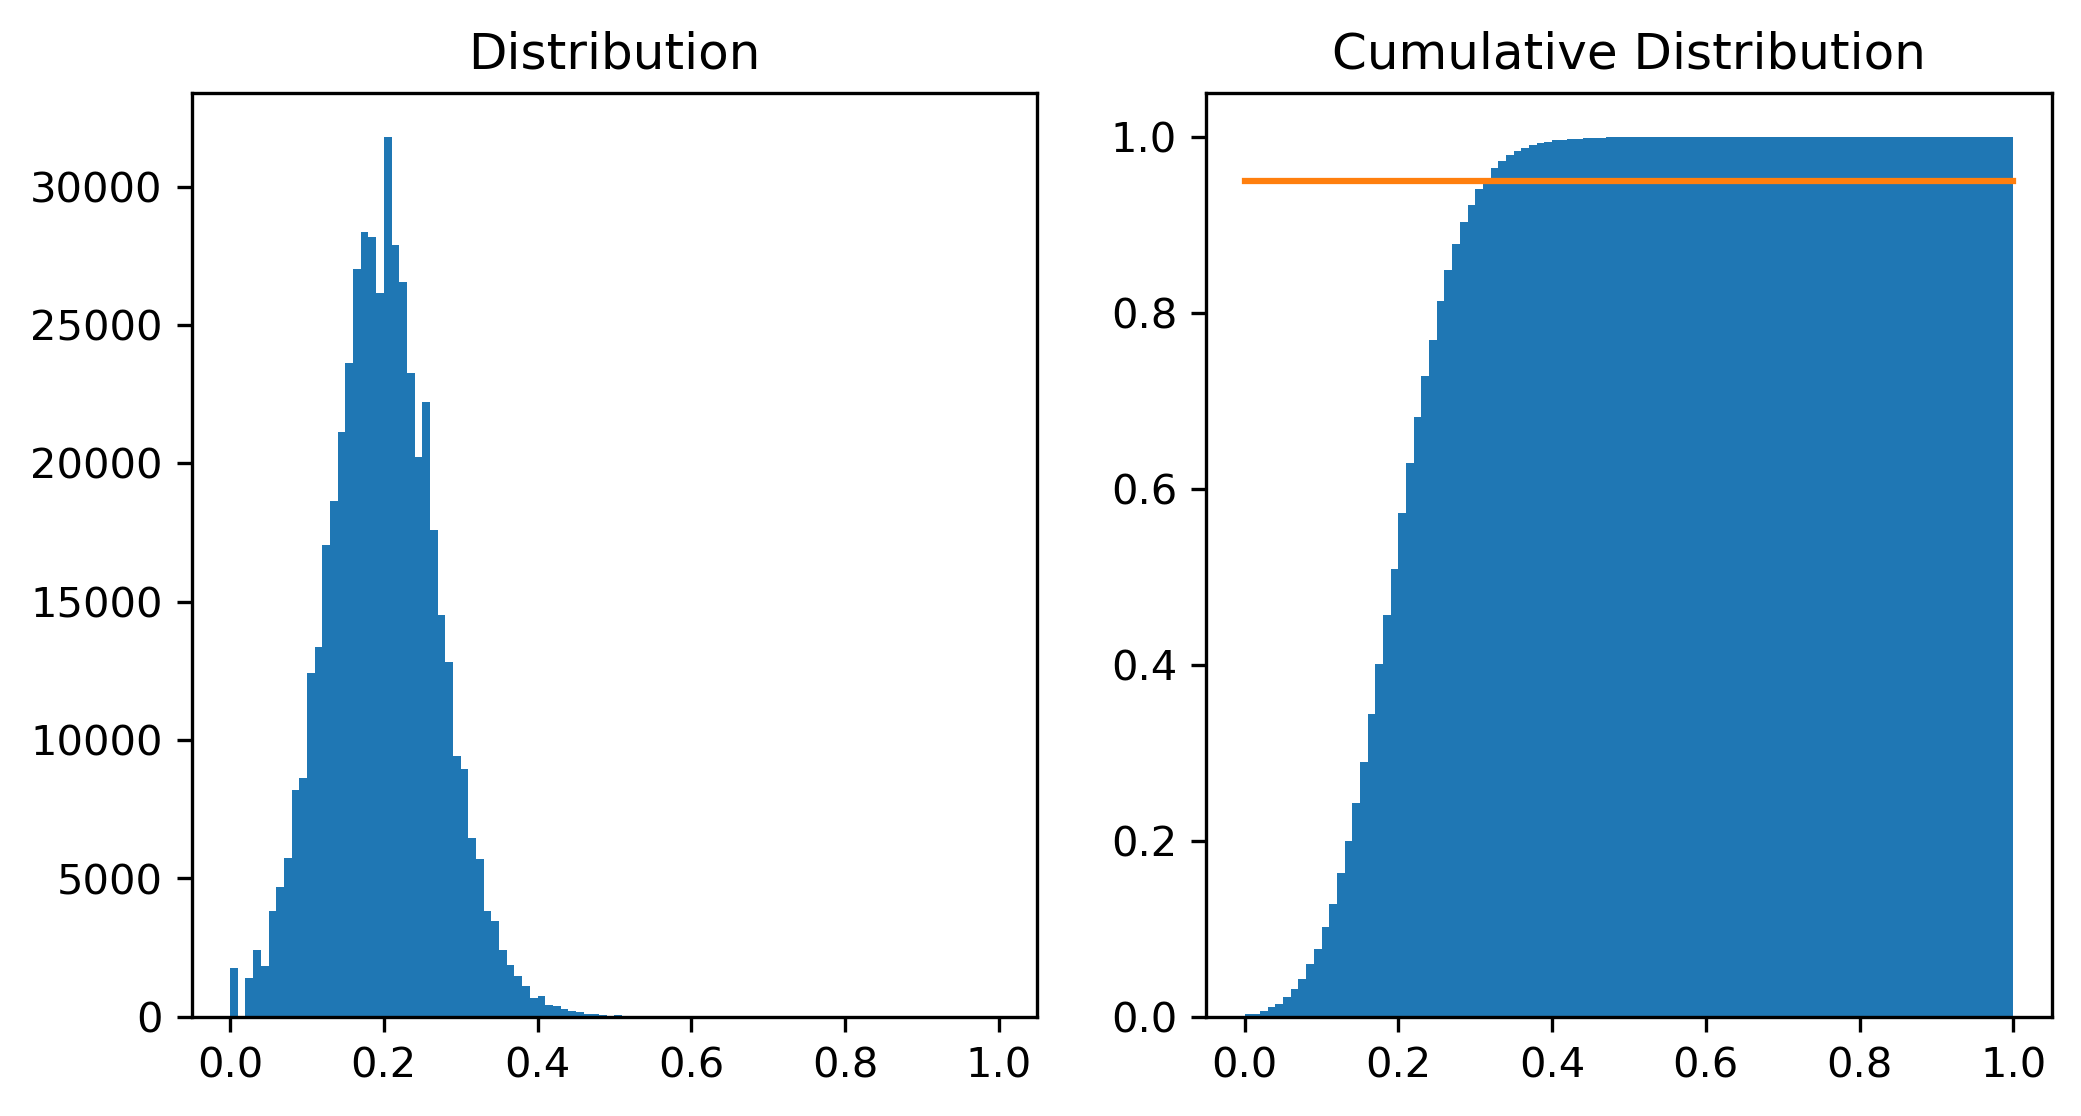



Using Morgan fingerprints and Cosine similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


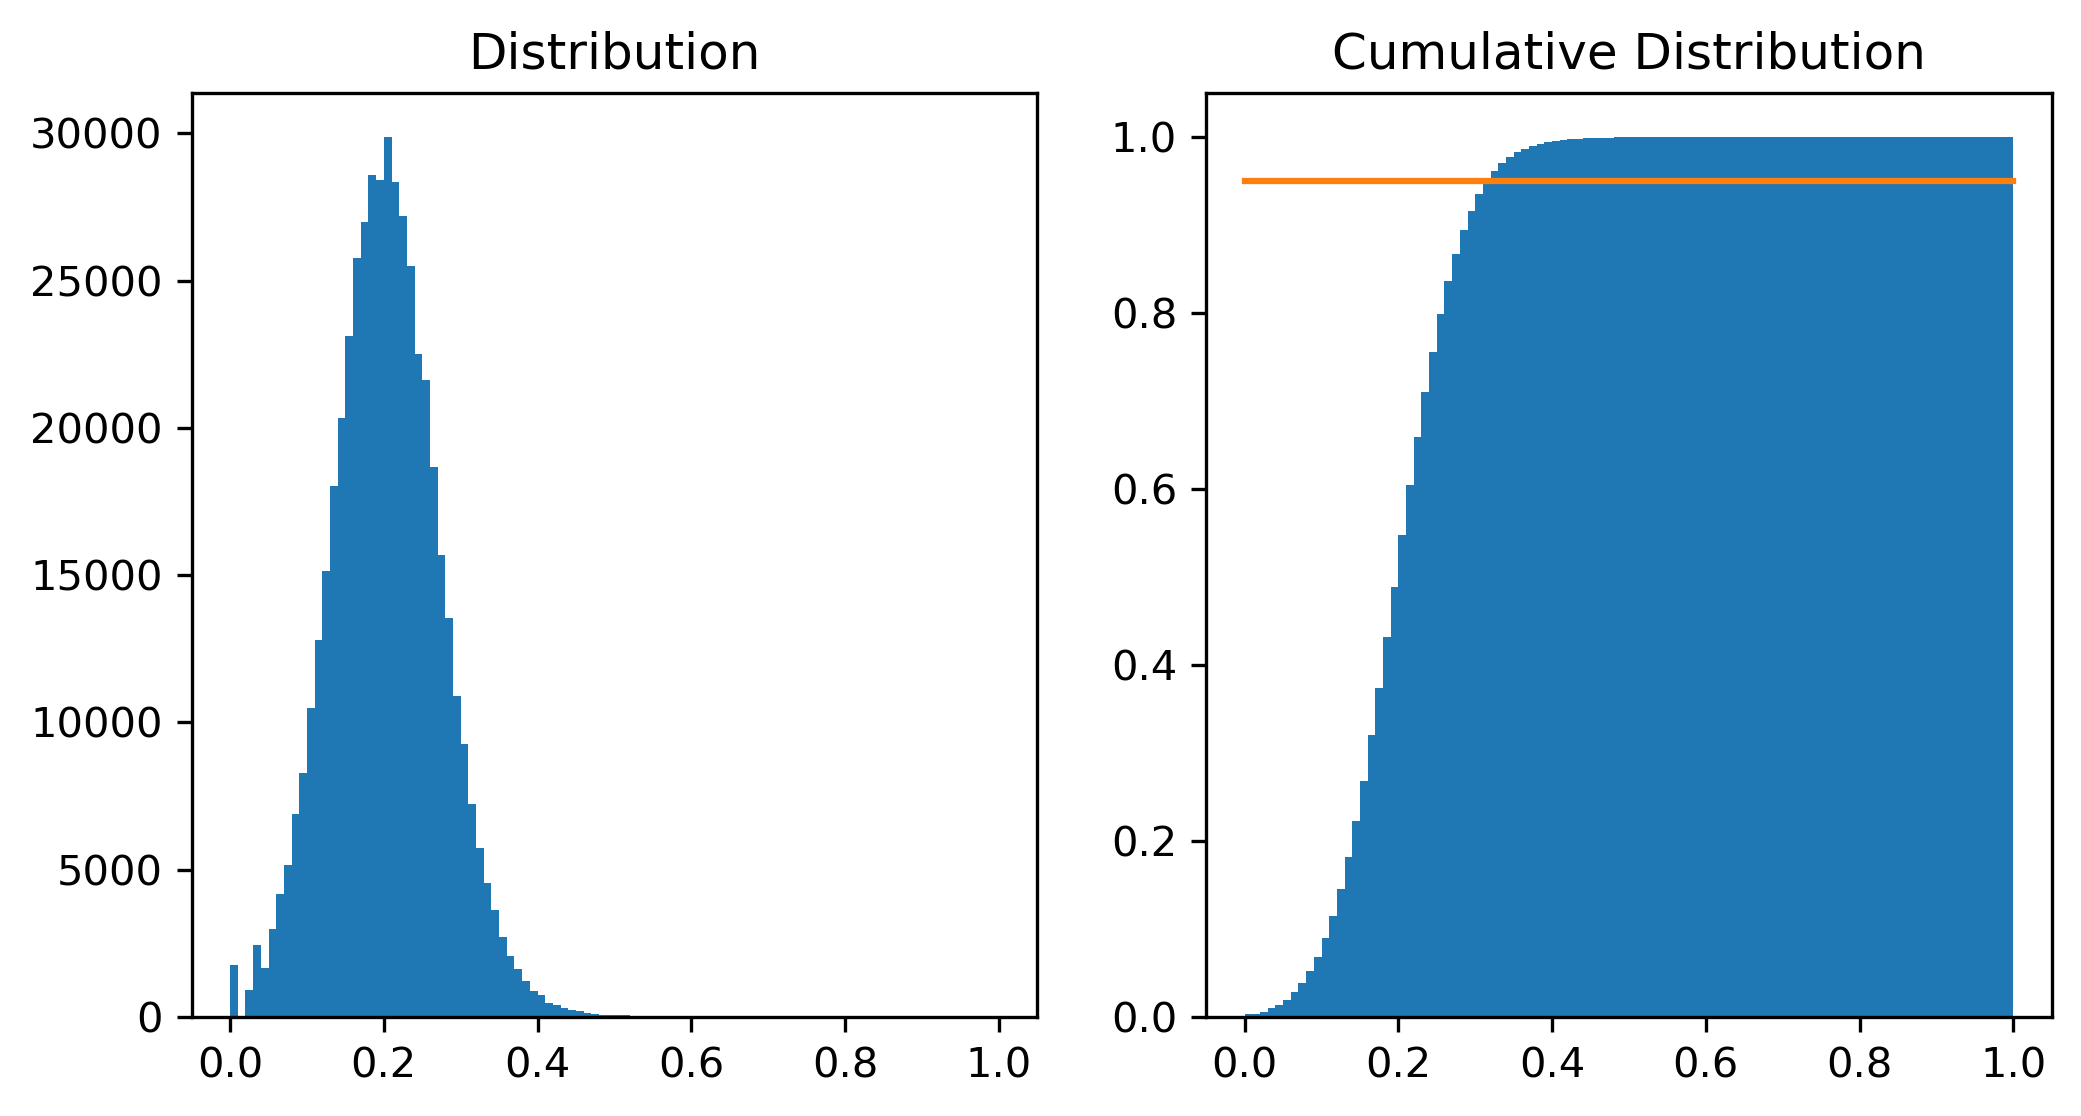



Using RDK fingerprint and Tanimoto similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


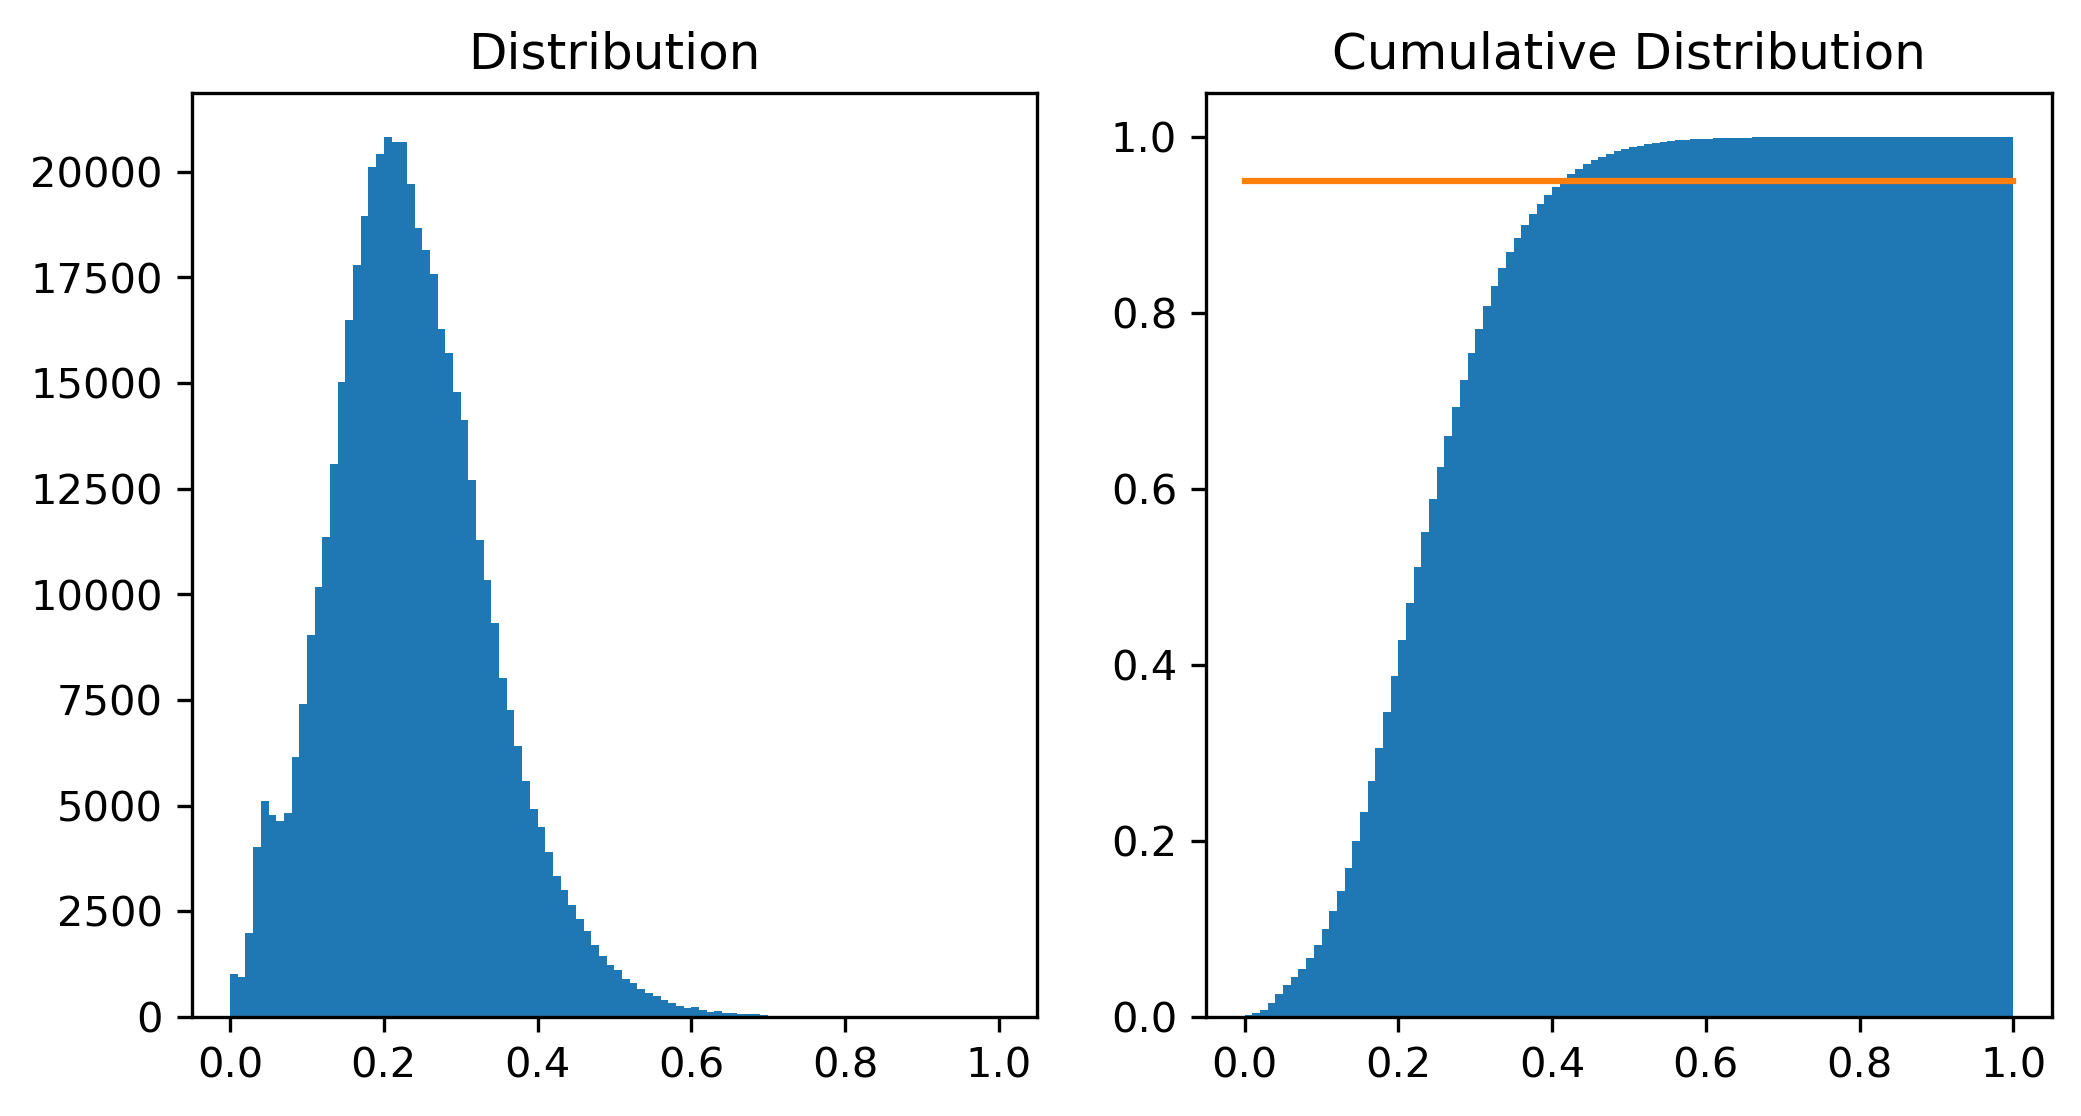



Using RDK fingerprint and Dice similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


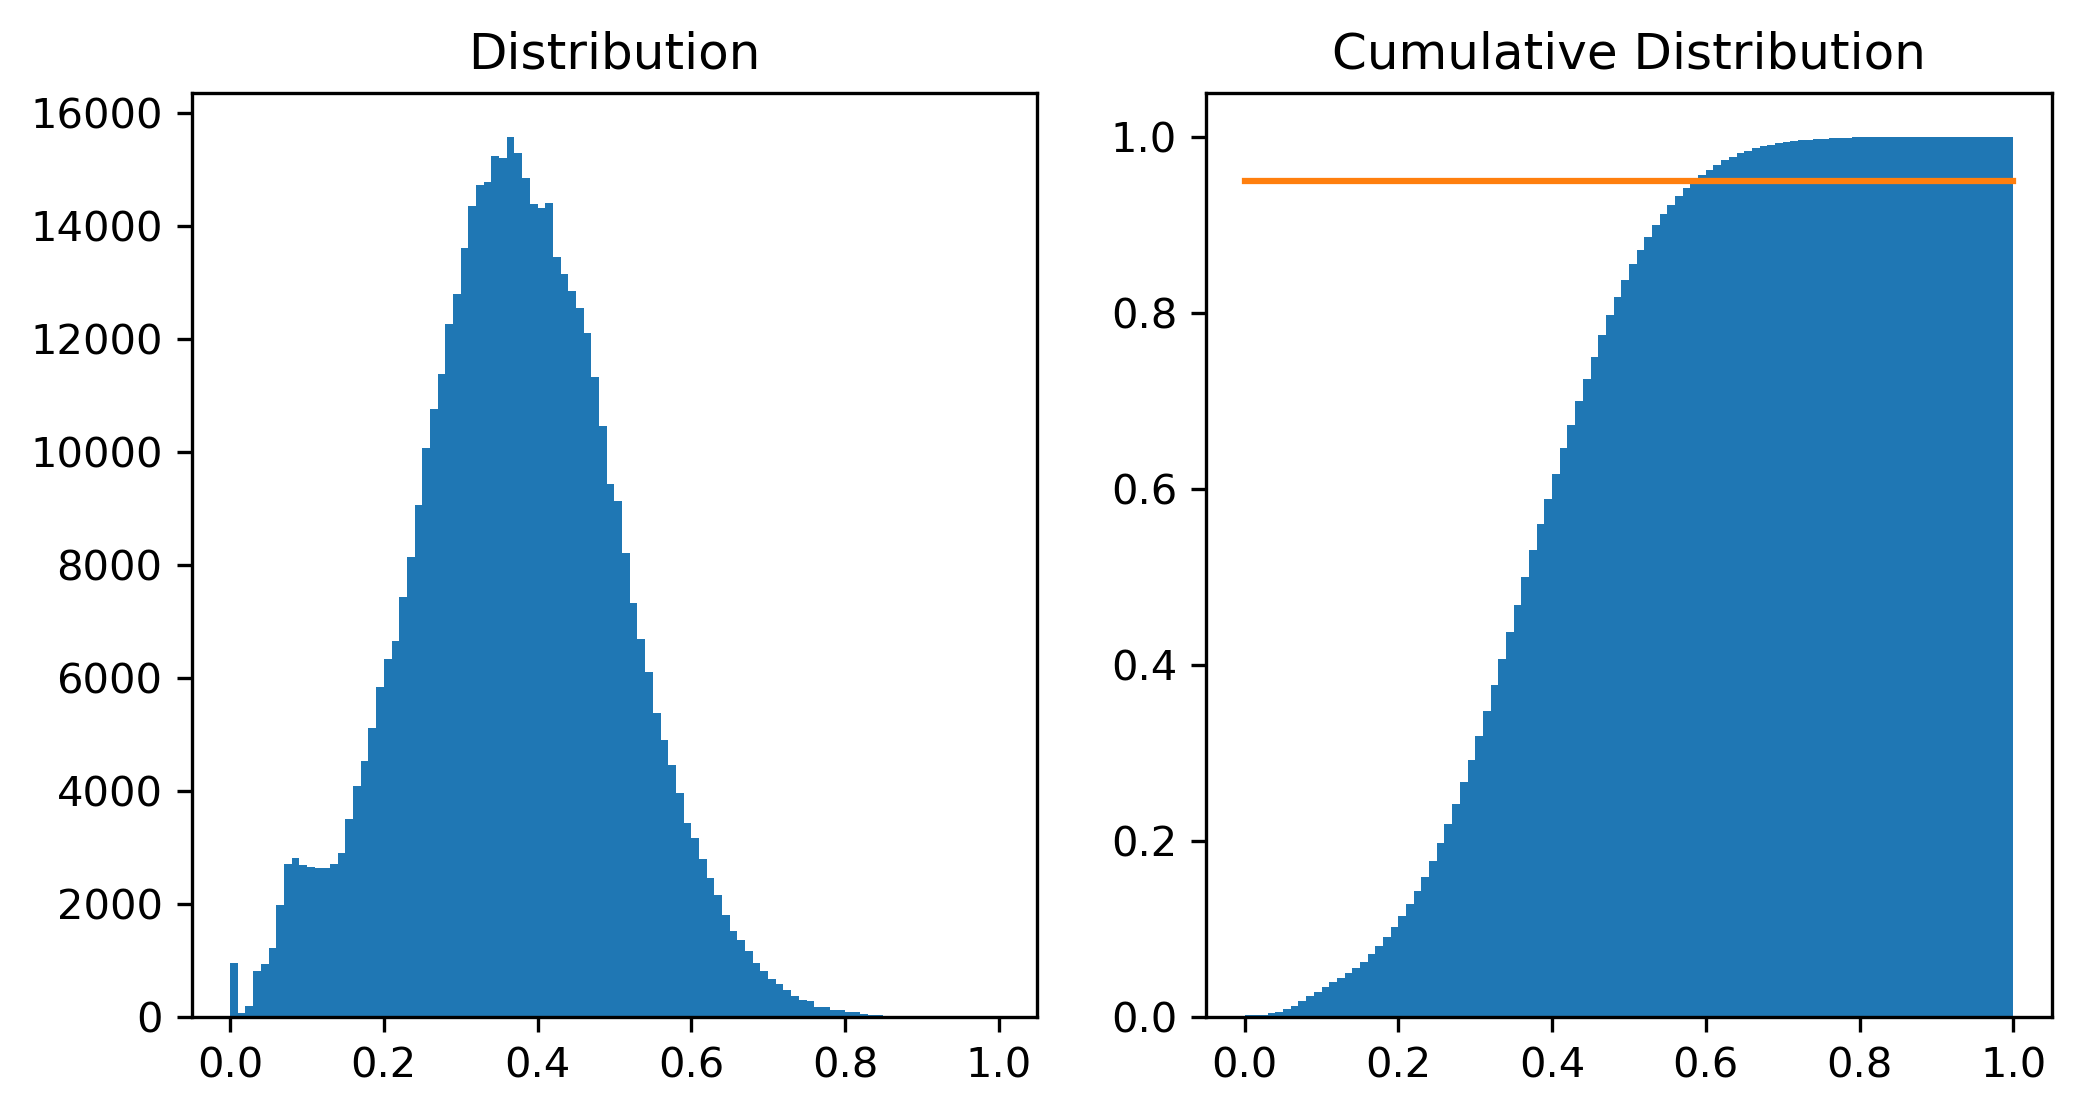



Using RDK fingerprint and Cosine similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


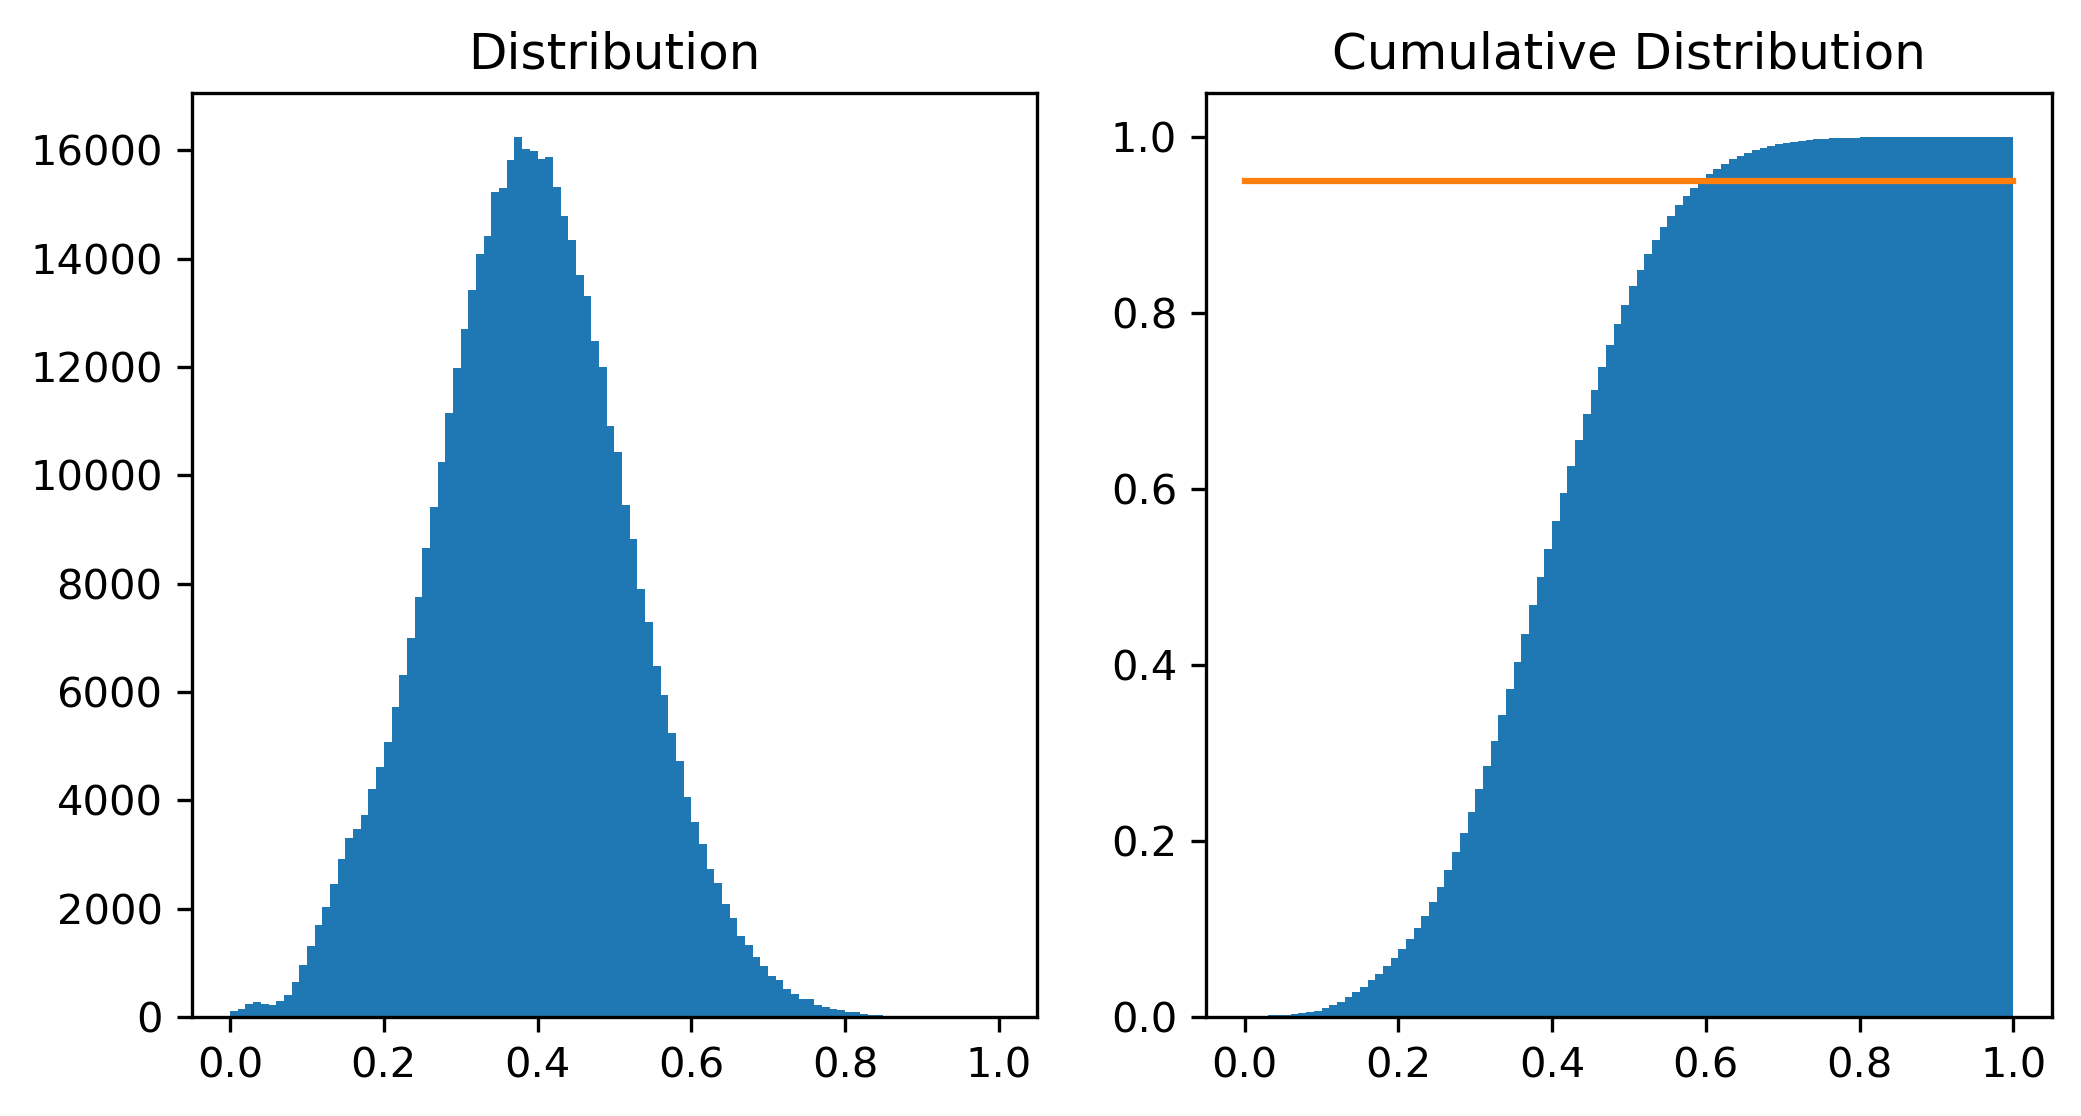



Using PubChem fingerprint and Tanimoto similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


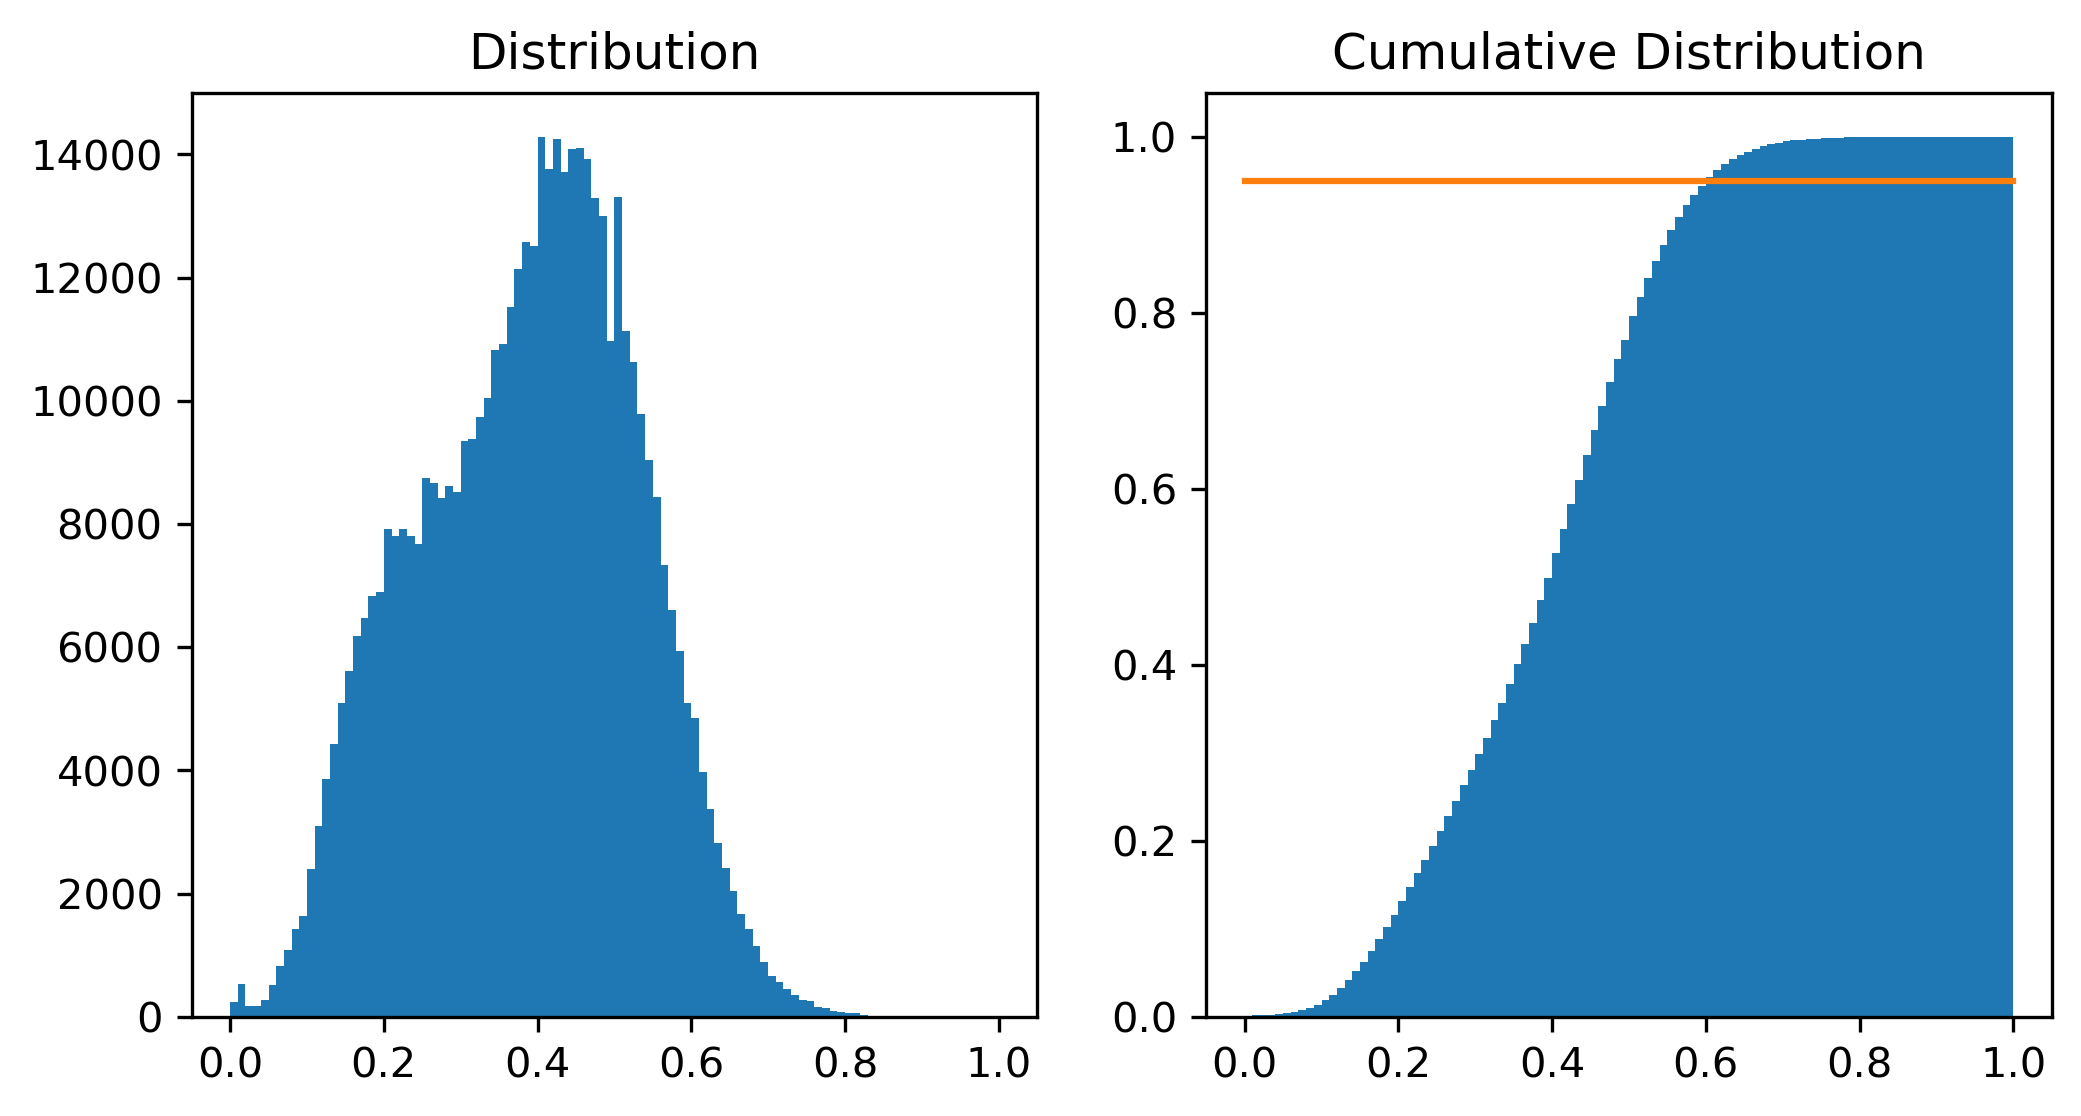



Using PubChem fingerprint and Dice similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


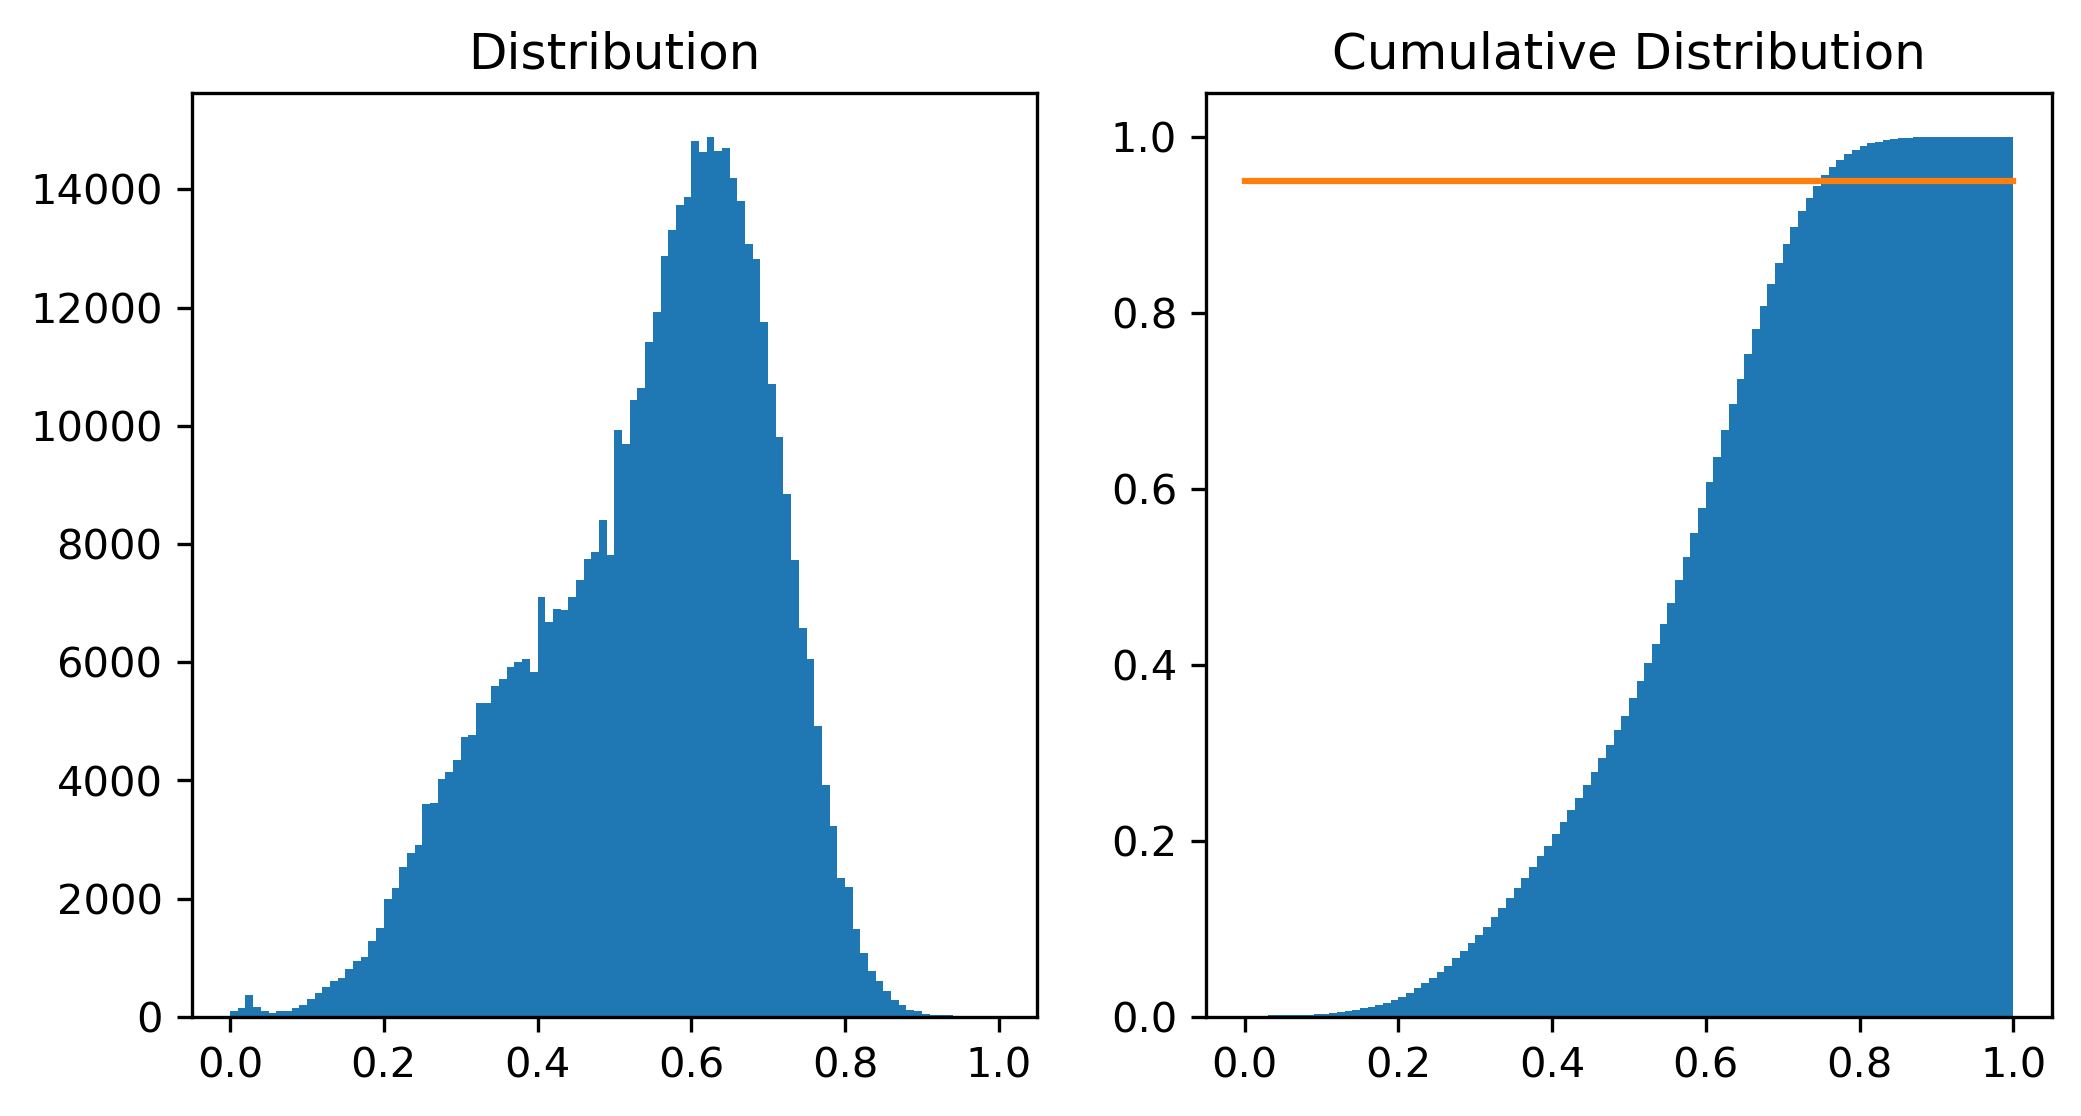



Using PubChem fingerprint and Cosine similarity
Processing compound 0 100 200 300 400 500 600 700 800 900 Done!


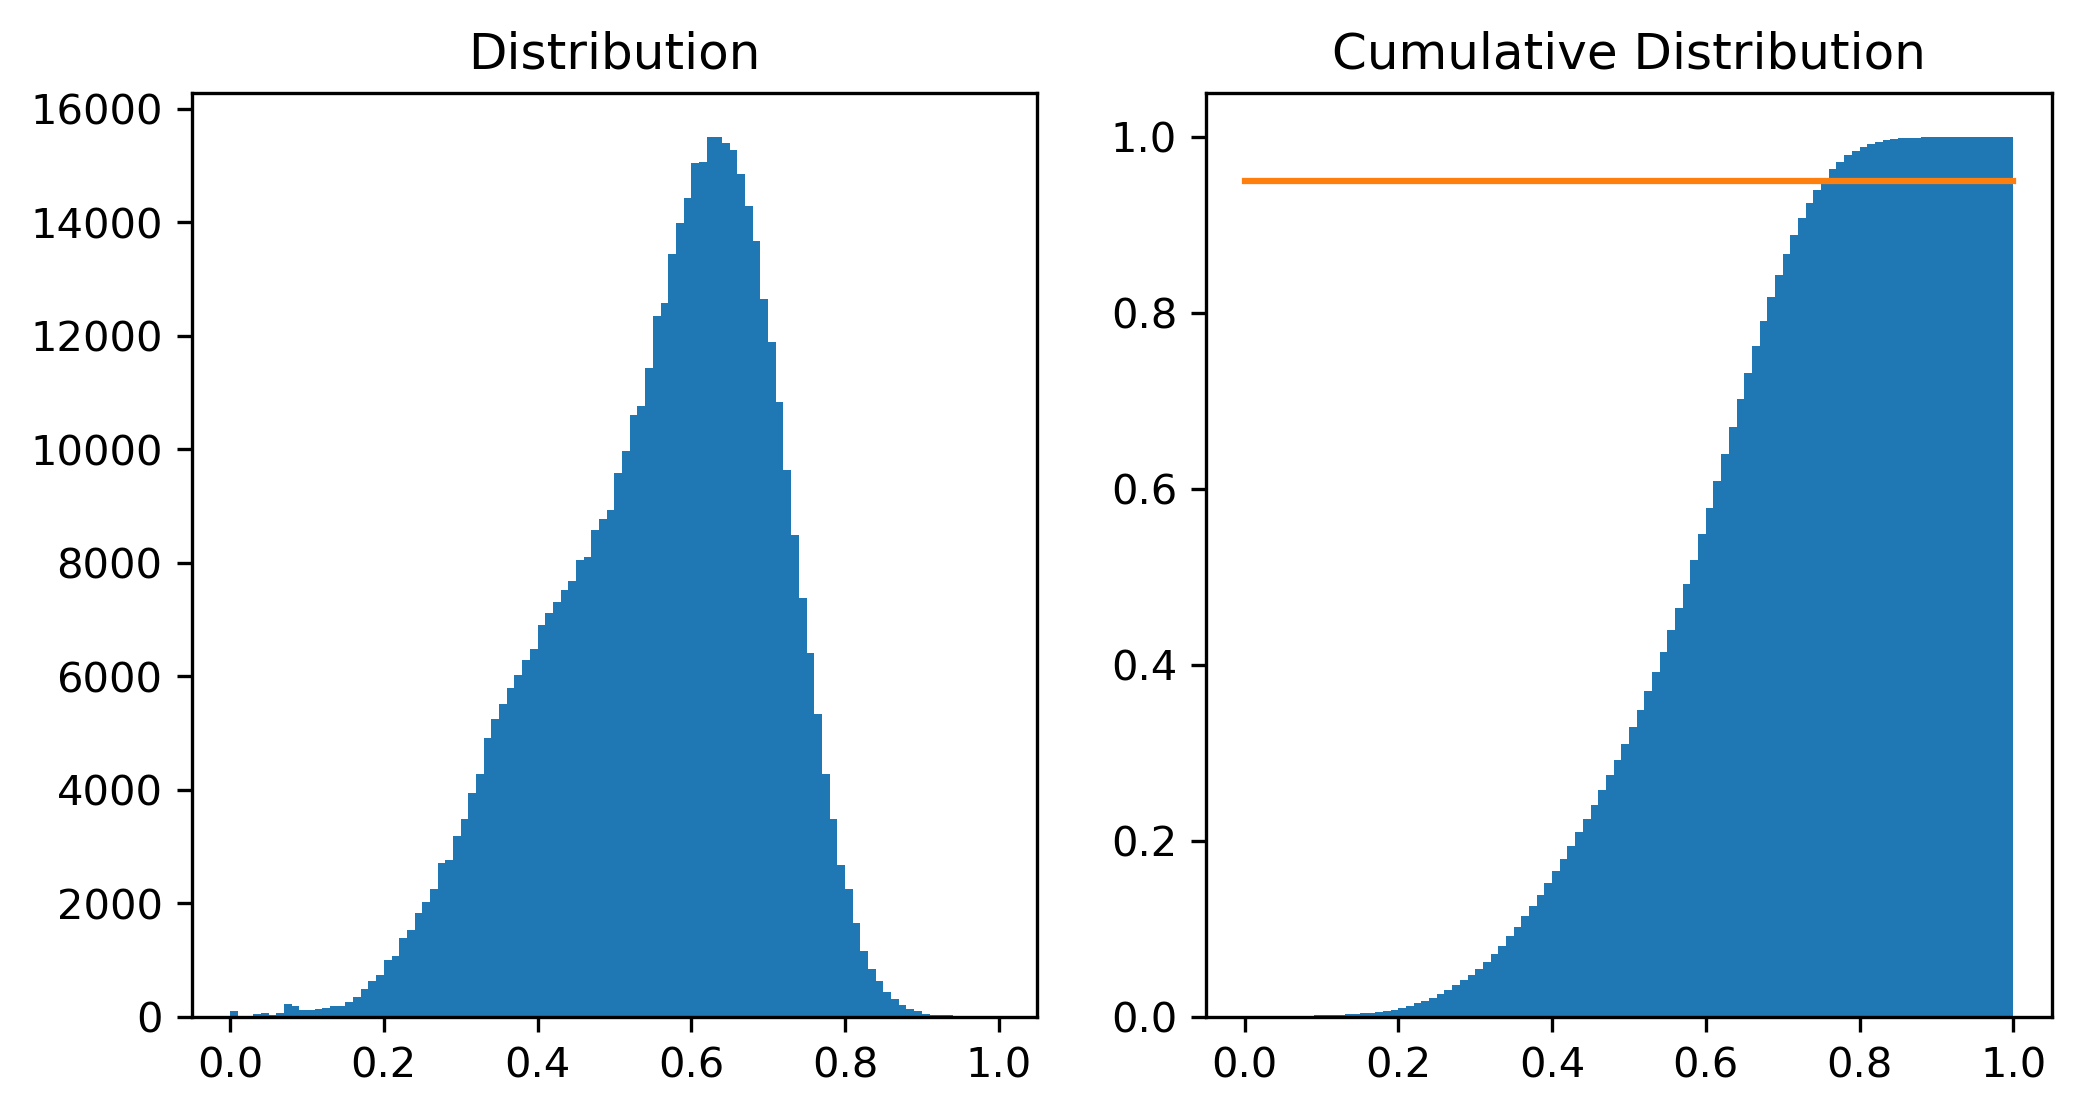

In [246]:
data = []
for fp_method, fps in fingerprints:
    
    for sim_method, method in similarity_methods:
        print(f"Using {fp_method} and {str(sim_method)} similarity")
        
        scores = []

        for i in range(0, len(fps)) :

            if (i == 0) :
                print("Processing compound ", end='')

            if (i % 100 == 0) :
                print(i, end=' ')

            for j in range(i+1, len(fps)) :
                scores.append(method(fps[i], fps[j]))

        print("Done!")
        
        mybins = [ x * 0.01 for x in range(101)]

        fig = plt.figure(figsize=(8,4), dpi=300)

        plt.subplot(1, 2, 1)
        plt.title("Distribution")
        plt.hist(scores, bins=mybins)

        plt.subplot(1, 2, 2)
        plt.title("Cumulative Distribution")
        plt.hist(scores, bins=mybins, density=True, cumulative=1)
        plt.plot([0,1],[0.95,0.95])
        plt.show()
        
        scores.sort()    # Sort the scores in an increasing order.

        # to find a threshold for top 5% compound pairs (i.e., 95% percentile)
        top_5_percent = scores[ round(len(scores) * 0.95) ]
        print('\n')
        data.append([fp_method, sim_method, mean(scores), stdev(scores), top_5_percent])

    

In [247]:
df = pd.DataFrame(data, columns=('Fingerprint_method', 'Similarity_method', 'mean_similarity', 'standard_deviation', '95_percentile'))
df

,Fingerprint_method,Similarity_method,mean_similarity,standard_deviation,95_percentile
0,MACCS keys,Tanimoto,0.344672,0.130948,0.564103
1,MACCS keys,Dice,0.498346,0.148006,0.721311
2,MACCS keys,Cosine,0.509944,0.143039,0.725018
3,Morgan fingerprints,Tanimoto,0.112098,0.044584,0.188235
4,Morgan fingerprints,Dice,0.198753,0.071105,0.316832
5,Morgan fingerprints,Cosine,0.203080,0.070866,0.320508
6,RDK fingerprint,Tanimoto,0.235724,0.103484,0.419122
7,RDK fingerprint,Dice,0.370408,0.133594,0.590678
8,RDK fingerprint,Cosine,0.390996,0.125445,0.599729
9,PubChem fingerprint,Tanimoto,0.387851,0.141073,0.605634


In [255]:
df.groupby('Fingerprint_method').mean()

,mean_similarity,standard_deviation,95_percentile
Fingerprint_method,,,
MACCS keys,0.450987,0.140664,0.670144
Morgan fingerprints,0.171310,0.062185,0.275192
PubChem fingerprint,0.497229,0.145175,0.705918
RDK fingerprint,0.332376,0.120841,0.536510


In [256]:
df.groupby('Similarity_method').mean()

,mean_similarity,standard_deviation,95_percentile
Similarity_method,,,
Cosine,0.416105,0.120077,0.600748
Dice,0.402736,0.126551,0.595802
Tanimoto,0.270086,0.105022,0.444274
